# What determines whether a planetary object is a synestia?

Let's say you and a friend sat on the edge of a playground merry-go-round (also known as a roundabout). You are sitting closer to the center and are strapped in place, while your friend is at the very edge free of restraints. If you join hands and hold on to each other while a third person spins the merry-go-round faster and faster, you'll reach a point where your hands cannot hold on. Your friend will be subject to their own speed of rotation about the merry-go-round as they fly off. This is essentially what happens when a planetary object transforms into a synestia.

##insert diagram here

A synestia is a planetary body (planet, for example) that is rotating so rapidly that its outer portion cannot "hold on" (the body crosses a threshold called the corotation limit) and moves at an angular velocity dictated by the gravity and gas (pressure) fields. This rapid rotation causes oblation, or a bulge along the equator, in the planet-like region.

A synestia is a planetary body that has exceeded the corotation limit. In other words, the body can no longer rotate together at the same angular velocity. Part of the body (located roughly near the body's equator) becomes disk-like and will rotate slower than the interior, which will continue to corotate rapidly. The corotation limit is dependent on a number of factors, namely, the mass of the body, the angular momentum of the body (determines the body's rate of rotation), the structure of the body's interior, and the composition of the body (e.g. rock versus iron). However, that makes the corotation limit hard to define via an equation, because it is dependent on so many parameters. So, that particular definition might not be of particular use to you. Let's add one more piece to your understanding of the corotation limit (the threshold above which planets turn into synestias).

Say there is a planet which has a moon stably orbiting it. This moon maintains a geosynchronous orbit (the time it takes the moon to orbit the planet is the same as the time it takes the planet to complete a rotation; the Moon is in geosynchronous orbit around Earth).

If we speed up the rotation of the planet, the equator will begin to bulge, as if the planet had been squashed down at the poles. This is what is known as oblate. The faster the planet spins, the more oblate it becomes.

As the planet's length of day decreases, the moon must orbit the planet in a shorter amount of time. To conserve angular momentum and maintain geosynchronous orbit, the moon must travel a shorter distance during the planet's day. The moon moves in toward the planet, decreasing the radius of the moon's orbit.

If this continues and the planet eventually spins so fast that its oblate equator reaches where its moon tightly orbits, then what? A moon can no longer keep up with the rotation of the planet. If the planet were to spin any faster, then even the equator of the planet could not corotate with the rest of the planet! That is the essence of the boundary between planet and synestia.

So, think of it like this: if a planet's equatorial radius exceeds the orbital radius of a geosynchronous satellite, then the planet morphs into a synestia. Please play with the interactive widget below to get a sense for how the equator and moon move in relation to one another as the planet's spin speeds up.

Play with the interactive widget below to get a sense of how massive, dense, and/or rapidly rotating this homogeneous body has to be in order to exceed the corotation limit and become a synestia. Many of the finer details about a body's interior structure are complicated, so we will simplify and assume we have a "homogeneous" spherical body [same material (no separation of a mantle and core), density, temperature throughout]. For reference:  
Earth's mass is 6.0 x 10$^{24}$ kg.  
Jupiter's mass is 1.9 x 10$^{27}$ kg.  
The Moon's mass is 7.3 x 10$^{22}$ kg.  
The average density of a rock (silicate) under standard conditions is 3300 kg/m$^3$.  
The average density of iron (alloy) under standard conditions is 7000 kg/m$^3$.  
The density of liquid water under standard conditions is roughly 1000 kg/m$^3$.

In [1]:
#find a given mean radius then solve for c
#then plot ellipsoid with c and a and print length of day
#interactive widget: change mean radius (slider), omega (slider), density of body (button or pull down)
#assume Earth mass

#r_geosynch = (G*M_Earth/omg**2)**(1./3.)

import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

G = 6.67408e-11 #mks

def Maclaurin(ecc):
    return 2.*(3. - 2.*ecc**2)*np.arcsin(ecc)*((1. - ecc**2)**0.5)/(ecc**3) - 6.*(1. - ecc**2)/(ecc**2) #- (omega**2)/(math.pi*G*rho)

def semi_axes(e, rho, M_Earth):
    # 0 <= e < 1
    # rho >= 0
    radius_avg_cubed = 3.*M_Earth/(4.*math.pi*rho) #m^3
    c = ((1. - e**2)*radius_avg_cubed)**(1./3.)
    a = c/((1. - e**2)**0.5)
    return c,a

def synestia_shape(T,rho,M_Earth):
    omega = 2.*math.pi/(T*3600.) #s^-1 #convert period to seconds
    radius_avg_cubed = 3.*M_Earth/(4.*math.pi*rho) #m^3
    omega_kep_avg = (G*M_Earth/radius_avg_cubed)**0.5
    Macla_ratio = (omega**2)/(math.pi*G*rho)

    ecc_interp = np.linspace(0.,0.952887,100)
    omg_ratio = Maclaurin(ecc_interp)
    f = interp1d(omg_ratio, ecc_interp)
    ecc_planet = f(Macla_ratio)
    if Macla_ratio > 0.449331:
        ecc_planet = 0.952887 #max. eccentricity possible for stable planet

    ecc_test = np.linspace(0.,1.,100)
    y_test = Maclaurin(ecc_test)

    n = 50
    theta = np.linspace(0.,math.pi,n)
    phi = np.arange(0.,math.pi,math.pi/n)
    c,a = semi_axes(ecc_planet, rho, M_Earth)
    omega_kep_a = (G*M_Earth/a**3)**0.5

    THETA, PHI = np.meshgrid(theta, phi)
    x = a*np.sin(THETA)*np.cos(PHI)
    z = c*np.cos(THETA)

    ind_x_R = np.where(np.amax(x))
    edge_ellip_x = x[ind_x_R]
    edge_ellip_z = z[ind_x_R]
    circ_x = (radius_avg_cubed**(1./3.))*np.linspace(-1,1,100)
    circ_y = (((radius_avg_cubed**(1./3.))**2 - circ_x**2)**0.5)

    plt.figure(figsize=(6,4))
    plt.fill_between(edge_ellip_x[0]/1e3,-edge_ellip_z[0]/1e3,edge_ellip_z[0]/1e3,color='orange')
    plt.fill_between(-edge_ellip_x[0]/1e3,-edge_ellip_z[0]/1e3,edge_ellip_z[0]/1e3,color='orange')
    plt.plot(circ_x/1e3,circ_y/1e3,'--',color='grey')
    plt.plot(circ_x/1e3,-circ_y/1e3,'--',color='grey')
    y_text = 0.#0.8*np.amax(circ_y)/1e3
    x_text = 0.#-11000.
    if (omega > omega_kep_a):
        plt.annotate('Planet has become\na synestia!',(x_text,y_text))
    else:
        plt.annotate('Still\na planet.',(x_text,y_text))
    plt.xlabel('x (km)')
    plt.ylabel('z (km)')
    plt.axis('equal')
    plt.show()

from ipywidgets import interactive,FloatLogSlider,IntSlider
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interactive_plot = interactive(synestia_shape,
         T=IntSlider(value=24, min=1, max=24, step=1, description='Length of Day for Planet (hr)',
                        continuous_update=True, readout=True, readout_format='.0f', style=style, layout=layout),
         rho=IntSlider(value=3300., min=1000., max=3700., step=100., description='Density of Planet (kg/m$^3$)',
                      continuous_update=True, readout=True, readout_format='.0f', style=style, layout=layout),
         M_Earth=FloatLogSlider(value=5.97219e24, base=10, min=22, max=27, step=1, description='Mass of Planet (kg)',
                      continuous_update=False, readout=True, readout_format='.1e', style=style, layout=layout)
        )
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(IntSlider(value=24, description='Length of Day for Planet (hr)', layout=Layout(width='40…

You may have noticed that it is easier for the planet to change into a synestia when you decrease the length of day for the planet (the time it takes for a planet to complete one rotation) as opposed to the planet's mass or density. The corotation limit is most sensitive to the rate of rotation of a body. The faster a planet spins, the more likely it will transition into a synestia. This is why it is easier for planets with greater angular momentum, particularly those involved in giant impacts, to become synestias.

In [ ]:
#EDITS REALLY NEEDED FOR BELOW


#Equatorial velocity intersecting Keplerian velocity
#How fast is the equator moving?
#change color when cross boundary
#make axis bigger, show geosynchronous orbit position -- where touch
#equation for synchronous orbit
#off plot: give number
#on plot: dot
#plt.figure()
#plt.plot(ecc_test,y_test,label='stable planet')
#plt.hlines(Macla_ratio,0.,1.01,color='grey',label='Earth')
#plt.plot(ecc_planet,Macla_ratio,'ro',label='eccentricity of Earth')
#plt.xlabel('eccentricity')
#plt.ylabel(r'$\omega^2/(G\pi\rho)$')
#plt.legend()
#plt.show()

## Check for the Angular Velocity Profile of a Synestia

To understand the kinematics within a synestia, it is important to know the general circulation within a synestia. This is where angular velocity ($\omega$) comes in.

If a wide range of giant impacts can form a synestia, what is the threshold for what defines a synestia? Let's first think about the internal structure and dynamics of a synestia in terms of angular velocity (insert link to glossary term here).

In [ ]:
#geosynchronous satellite: cartoon gets hot - hits orbit - even hotter something else happens
#plot: what is geosynchronous orbit based on change in Earth's day - when you're hot easier to get over it: slider bar

### A Synestia's Angular Velocity Profile is Unique

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


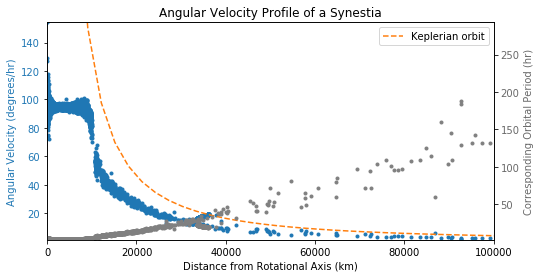

In [2]:
from syndef import synfits
rxy_Kep = np.linspace(0.,300.e6,100)
angvel_Kep = ((G*np.sum(synfits.SNAP_CukStewart.m)/rxy_Kep**3)**0.5)*3600*180/math.pi
fig,ax1 = plt.subplots(figsize=(8,4))
plt.title('Angular Velocity Profile of a Synestia')
ax1.plot(synfits.SNAP_CukStewart.rxy[synfits.SNAP_CukStewart.ind_mid]/1e3,synfits.SNAP_CukStewart.omg_z[synfits.SNAP_CukStewart.ind_mid]*3600*180/math.pi,'.')
ax1.plot(rxy_Kep/1e3,angvel_Kep,'--',label='Keplerian orbit')
ax1.set_xlabel('Distance from Rotational Axis (km)')
ax1.set_ylabel('Angular Velocity (degrees/hr)',color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim([np.amin(synfits.SNAP_CukStewart.omg_z[synfits.SNAP_CukStewart.ind_mid]*3600*180/math.pi),np.amax(synfits.SNAP_CukStewart.omg_z[synfits.SNAP_CukStewart.ind_mid]*3600*180/math.pi)])
plt.xlim([0.1,100.e3])
plt.legend()
ax2 = ax1.twinx()
period = 2.*math.pi/(synfits.SNAP_CukStewart.omg_z[synfits.SNAP_CukStewart.ind_mid]*3600)
ax2.plot(synfits.SNAP_CukStewart.rxy[synfits.SNAP_CukStewart.ind_mid]/1e3,period,'.',color='grey')#,alpha=0)
ax2.set_ylabel('Corresponding Orbital Period (hr)',color='dimgrey')
ax2.set_ylim([np.amin(period),250])
ax2.tick_params(axis='y', labelcolor='dimgrey')
plt.show()

In [ ]:
#draw interactive below
#angular velocity profile with length of day (rotation speed)
#have Keplerian
#const density spheroid (MacLaurin) for to moving into synestia limit
#hotter on outside than inside, hits synestia limit much sooner
#simplify
#caveat: in reality, this would be more complicated - density gradient, temperature gradient
#as get denser, gets hotter
#if spinning faster, hit it sooner
#what's the radius of the spinning body
#not a perfect planet, just to illustrate the effect
#another section: why make very puffy, very big

In [ ]:
#INSERT FIGURE OF ANGULAR VELOCITY PROFILE OF SYNESTIA; CONTRAST WITH LINEAR VELOCITY

This is a plot of the midplane (z = 0) angular velocity profile. The profile is continuous because there are no dynamically distinct features of a synestia. It is a connected body. Notice that the profile is flat at smaller radii. This is the corotating portion of a synestia. All material rotates about its axis together at the same angular velocity. At larger radii, the profile drops off, where material in a synestia can no longer corotate.

The angular velocity is lower than what it would be for a Keplerian orbit. A Keplerian orbit is a stable (no inward or outward spiralling) elliptical orbit. The orbiting body is moving fast enough through a vacuum around its central body to resist the inward pull of the central body's first-order gravity. In other words, the only force that is acting (and is balanced) is gravity. In the non-corotating region of a synestia, the material experiences a sub-Keplerian orbit. There is sufficient pressure support to counteract gravity. This allows the gas to orbit at an angular velocity that is slower than it would be for an equivalent Keplerian orbit.

Some of largest planetary structures are moons, planets, planetary disks (planets with disks), and synestias. How is a planet with an orbiting debris disk different from a synestia?

In [ ]:
#Keplerian orbit: what is it?
#math
#how does pressure change? slower velocity at that location
#plot difference, slider bar for pressure effect
#diff in vel is headwind
#put in the equation: adjustable parameter (adding pressure support)
#how does this change 
#headings: section numbers: make as bite-sized as possible, want it in a single screen (like hyperphysics, boxes if you want)